# Week 8 - Support Vector Machines
### Dr. David Elliott

1.6. [Support Vector Classifier (SVC)](#svc)

1.7. [Support Vector Machine (SVM)](#svm)

1.8. [Exercises](#exercises)

__Quick Recap__

The maximal margin hyperplane is the solution to the optimisation problem for choosing $\beta_0,\beta_1, ...\beta_p$ to maximise $M$,

subject to $\sum^p_{j=1}\beta^2_j = 1$,

$\beta_0 + \beta_1x_{i1} + \beta_2x_{i2} + ... + \beta_pX_{ip} \geq M \quad \forall i = 1,...,n$

The constraints above just ensure that each observation is on the correct side of the hyperplane and at least a distance $M$ from the hyperplane; meaning $M$ represents our hyperplane.

---
James, G., Witten, D., Hastie, T., & Tibshirani, R. (2013). An introduction to statistical learning (Vol. 112, p. 18). New York: springer.

- $\beta_0 + \beta_1X_{i1} + \beta_2X_{i2} + ... + \beta_pX_{ip} \geq M \quad \forall i = 1,...,n$ guarentees each datapoint is on the correct side of the hyperplane if M is posaative
- the constraint $\sum^p_{j=1}\beta^2_j = 1$, can be used to show that the perpendicular distance from the $i$th observation to the hyperplane is given by $y_i(\beta_0 + \beta_1x_{i1} + \beta_2x_{i2} + ... + \beta_px_{ip})$

# 1.6. Support Vector Classifier (SVC) <a id='svc'></a>

SVC's are a generalisation and extension of the maximal margin classifier so it can be applied to a broader range of cases<sup>James</sup>.

In practice they are more robust to individual observations and better classify most training observations than the Maximal Margin Classifier. This is because they take the approach it is better to missclassify some training examples in order to do a better job classifying the rest.

This is called a *soft margin* as it allows some violations by the training data by a small subset of training observation, not only on the wrong side of the margin, but wrong side of the hyperplane.

- "Developed in the computer science community in the 1990s"<sup>Géron</sup>
- Not always the data could be perfectly separated by a K − 1 dimensional hyperplane. To overcome this problem we could either tweak the constraints on the hyperplane to allow some points to be misclassified (soft margin) or alternatively we could transform the data to be separable by a hyperplane in another space (kernel method).

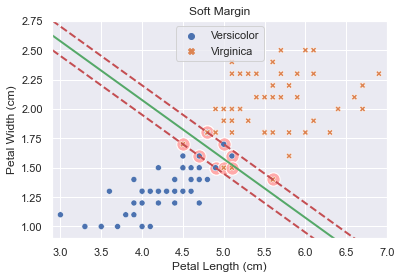

In [23]:
soft_margin("Soft Margin", hyperplane=True)
plt.show()

This is the solution to the optimisation problem for choosing $\beta_0,\beta_1, ...\beta_p$, with a slack variable $\epsilon_1,..., \epsilon_n$, to maximise $M$,

subject to $\sum^p_{j=1}\beta^2_j = 1$,

$\beta_0 + \beta_1x_{i1} + \beta_2x_{i2} + ... + \beta_pX_{ip} \geq M(1-\epsilon_i)$,

$\epsilon \geq 0$, $\sum^n_{i=1}\epsilon_i \leq C$,

where $C$ is a nonnegative tuning parameter.

---
$\epsilon_i$ tells us where the $i$th observation is located relative to the hyperplane; $\epsilon_i = 0$ being on the correct side of the margin, $\epsilon_i > 0$ being on the wrong side of the margin, and $\epsilon_i > 1$ on the wrong side of the hyperplane.

$\epsilon_1 = ... = \epsilon_n = 0$ is the maximal margin hyperplane optimisation.

- slack variable $\epsilon_1,..., \epsilon_n$ allow individual observations to be on the wrong side of the margin or hyperplane.
- test observations are classified as before, $f(x^*) = \beta_0 + \beta_1x^*_1 + ... + \beta_px^*_p$

## Tuning Parameter (C)

$C$ bounds the sum of $\epsilon_i$'s, so a smaller C creates a wider boundary with a larger number of, and more severe, margin violations. $C$ can therefore be viewed as a budget for violations to the margin.

However, in Sci-kit learn _"the strength of the regularization is inversely proportional to C"_!

__[EXPLAIN WHY THIS IS THE CASE]__

In [24]:
def soft_margin(c_list):
    virgin_versi = iris_vis[["petal length (cm)", "petal width (cm)", "target"]]
    virgin_versi = virgin_versi[virgin_versi.target != "Setosa"]

    X = virgin_versi[["petal length (cm)", "petal width (cm)"]].values
    y = virgin_versi[["target"]].replace({'Versicolor':0, 'Virginica':1}).values.ravel()

    scaler = StandardScaler()
    svm_clf1 = LinearSVC(C=c_list[0], loss="hinge", random_state=42)
    svm_clf2 = LinearSVC(C=c_list[1], loss="hinge", random_state=42)

    scaled_svm_clf1 = Pipeline([
            ("scaler", scaler),
            ("linear_svc", svm_clf1),
        ])
    scaled_svm_clf2 = Pipeline([
            ("scaler", scaler),
            ("linear_svc", svm_clf2),
        ])

    scaled_svm_clf1.fit(X, y)
    scaled_svm_clf2.fit(X, y)

    # Convert to unscaled parameters
    b1 = svm_clf1.decision_function([-scaler.mean_ / scaler.scale_])
    b2 = svm_clf2.decision_function([-scaler.mean_ / scaler.scale_])
    w1 = svm_clf1.coef_[0] / scaler.scale_
    w2 = svm_clf2.coef_[0] / scaler.scale_
    svm_clf1.intercept_ = np.array([b1])
    svm_clf2.intercept_ = np.array([b2])
    svm_clf1.coef_ = np.array([w1])
    svm_clf2.coef_ = np.array([w2])

    # Find support vectors (LinearSVC does not do this automatically)
    t = y * 2 - 1
    support_vectors_idx1 = (t * (X.dot(w1) + b1) < 1).ravel()
    support_vectors_idx2 = (t * (X.dot(w2) + b2) < 1).ravel()
    svm_clf1.support_vectors_ = X[support_vectors_idx1]
    svm_clf2.support_vectors_ = X[support_vectors_idx2]

    fig, axes = plt.subplots(ncols=2, figsize=(10,2.7), sharey=True)

    plt.sca(axes[0])
    plot_svc_decision_boundary(svm_clf1, 4, 5.9)
    legend_labels = virgin_versi[["target"]].values.ravel()
    sns.scatterplot(x = X[:,0], y = X[:,1], hue=legend_labels, style = legend_labels)
    plt.xlabel("Petal length", fontsize=14)
    plt.ylabel("Petal width", fontsize=14)
    plt.legend(loc="upper left", fontsize=14)
    plt.title("$C = {}$".format(svm_clf1.C), fontsize=16)
    plt.axis([4, 5.9, 0.8, 2.8])

    plt.sca(axes[1])
    plot_svc_decision_boundary(svm_clf2, 4, 5.99)
    g = sns.scatterplot(x = X[:,0], y = X[:,1], hue=legend_labels, style = legend_labels, legend=False)
    plt.xlabel("Petal length", fontsize=14)
    plt.title("$C = {}$".format(svm_clf2.C), fontsize=16)
    plt.axis([4, 5.9, 0.8, 2.8])

    plt.show()

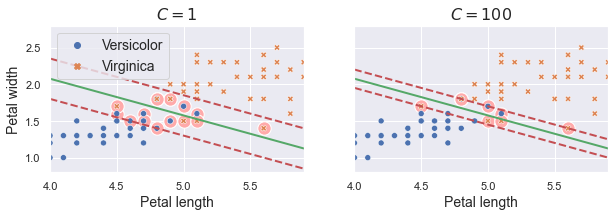

In [25]:
soft_margin([1,100])

$C$ is a tuning parameter that controls the bias-variance trade-off. [Insert a line about the bias-variance trade-off]. When $C$ is small we have narrow margins rarely violated, but highly fit to the training data (low bias-high variance). Coversely, when larger, the margin is wider amounting to less hard fitting (high bias-low variance).

Like most hyper-parameters, it is often chosen using cross-validation.

Alike to maximal margin classifiers, SVC's only rely on a few observations, those on the margin or those that violate the margin (*Support Vectors*) - if they are on the correct side of the margin they dont change the classifier. This does mean that they are robust to observations far away from the hyperplane.

# 1.7. Support Vector Machine <a id='svm'></a>
Aims to address the situation where the boundry between two classes is not linear.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

def non_linear_examples():
    fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(15, 5))
    axes = axes.flatten()
    plt.sca(axes[0])
    nl1, y1 = datasets.make_classification(n_samples=300, n_features=2, 
                                          n_redundant=0, n_informative= 2, 
                                          n_classes=3, n_clusters_per_class=1, 
                                          random_state=14, class_sep=30, 
                                          hypercube=False)
    y1 = np.where(y1==1,0,y1)
    y1 = np.where(y1==2,1,y1)
    sns.scatterplot(nl1[:,0], nl1[:,1], y1, legend=False)

    plt.sca(axes[1])
    nl2, y2 = make_moons(n_samples=300, noise=0.15, random_state=42)
    sns.scatterplot(nl2[:,0], nl2[:,1], y2, legend=False)
    
    svm_clf1 = LinearSVC(random_state=42).fit(nl1, y1)
    svm_clf2 = LinearSVC(random_state=42).fit(nl2, y2)

    # Convert to unscaled parameters
    b1 = svm_clf1.intercept_[0]
    b2 = svm_clf2.intercept_[0]
    w1 = svm_clf1.coef_[0]
    w2 = svm_clf2.coef_[0]

    # Find support vectors (LinearSVC does not do this automatically)
    t1 = y1 * 2 - 1
    t2 = y2 * 2 - 1
    support_vectors_idx1 = (t1 * (nl1.dot(w1) + b1) < 1).ravel()
    support_vectors_idx2 = (t2 * (nl2.dot(w2) + b2) < 1).ravel()
    svm_clf1.support_vectors_ = nl1[support_vectors_idx1]
    svm_clf2.support_vectors_ = nl2[support_vectors_idx2]

    plt.sca(axes[2])
    plot_svc_decision_boundary(svm_clf1, -5, 4, highlight=False)
    sns.scatterplot(nl1[:,0], nl1[:,1], y1, legend=False)

    plt.sca(axes[3])
    plot_svc_decision_boundary(svm_clf2, -1.5, 2.5, highlight=False)
    sns.scatterplot(nl2[:,0], nl2[:,1], y2, legend=False)

    plt.show()

In [ ]:
import warnings
# TEMP
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    non_linear_examples()

- A hyperplane does not need to be linear as the input feature space can be projected to higher dimensions using a kernel (e.g. radial basis kernel<sup>2,3</sup>), allowing a hyperplane to be fitted to split the data into classes. The data can then be mapped back into the original feature space to create a nonlinear separation boundary.

---
2. Cover, T. M. (1965). Geometrical and statistical properties of systems of linear inequalities with applications in pattern recognition. IEEE transactions on electronic computers, (3), 326-334.
3. Varsavsky, A., Mareels, I., & Cook, M. (2016). Epileptic seizures and the EEG: measurement, models, detection and prediction. CRC Press.

We could consider enlarging the feature space using quadratic, cubic or higher-order polynomial functions, however the larger the number of features, the higher computational burden. Instead it is common to enlarge the feature space using an extension of a SVC termed a Support Vector Machine, which uses _kernels_.

In [ ]:
# https://github.com/ageron/handson-ml2/blob/master/05_support_vector_machines.ipynb
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

In [ ]:
# https://github.com/ageron/handson-ml2/blob/master/05_support_vector_machines.ipynb
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

polynomial_feat = Pipeline([
        ("poly_features", PolynomialFeatures(degree=3)),
        ("scaler", StandardScaler()),
        ("svm_clf", LinearSVC(C=10, loss="hinge", random_state=42))
    ])

polynomial_svm = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel='poly', degree=3, C=10, random_state=42))
    ])

In [ ]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    print("Polynomial Feature Engineering")
    %timeit polynomial_feat.fit(X, y)
    print("Polynomial Kernel")
    %timeit polynomial_svm.fit(X, y)

...although in this case (with these specific hyperparameters) the feature engineering performs better. SVM can be sensitive to hyperparameter settings so we need to normally cross-validate these!

In [ ]:
# https://github.com/ageron/handson-ml2/blob/master/05_support_vector_machines.ipynb
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

fig, axes = plt.subplots(ncols=2, figsize=(15, 5))
plt.sca(axes[0])
plot_predictions(polynomial_feat, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])
plt.sca(axes[1])
plot_predictions(polynomial_svm, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

plt.show()

The kernel apporach is an efficient computational approach to enlarge our feature space to accommodate a non-linear boundary.

Skipping over some technical details (see __REF__), it turns out we can use the inner products of two observations rather than using the observations themselves:

$<x_i,x_{i^{\prime}}> = \sum^P_{j=1}x_{ij}x_{i^{\prime}j}$.

Using this we can represent the linear support vector classifier as: 

$f(x) = \beta_0 + \sum^n_{i=1}\alpha_i<x,x_i>$.

In the above case, for estimating the parameters $\alpha_1...,\alpha_n$ and $\beta_0$, we need the $n(n-1)/2$ inner products $<x,x_i>$ between all pairs of training observations. Similarly, if wanted to compute $f(x)$ we would need to the inner product between $x$ and each training point $x_i$.

However, $\alpha$ is nonzero only for support vectors, so if we have a collection of indicies of these support points we can do the following instead:

$f(x) = \beta_0 + \sum_{i\in S}\alpha_i<x,x_i>$.

Also instead of actually calculating the inner product, we could instead use a _generalisation_, $K(x,x_{i^{\prime}})$, where $K$ is a _kernel_. We can now define the classifier as:

$f(x) = \beta_0 + \sum_{i\in S}\alpha_iK(x,x_i)$.

A kernel is a function that quantifies the similarity of two observations. For example, for a _linear kernel_ we could use:

$K(x_i, x_{i'}) = \sum^P_{j=1}x_{ij}x_{i'j}$,

where we quantifiy the similarity of pairs of observations using Pearson (standard) correlation.

However, we could use other forms of kernel to fit the support vector classifier in a higher-dimensional space, such as a _polynomial kernel_:

$K(x_i, x_{i'}) = (1+\sum^P_{j=1}x_{ij}x_{i'j})^d$,

where d is a positive integer.

__[MORE INFO ON polynomial kernels]__

In [ ]:
# https://github.com/ageron/handson-ml2/blob/master/05_support_vector_machines.ipynb
def poly_info():
    X1D = np.linspace(-4, 4, 9).reshape(-1, 1)
    X2D = np.c_[X1D, X1D**2]
    y = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])

    plt.figure(figsize=(10, 3))

    plt.subplot(121)
    plt.grid(True, which='both')
    plt.axhline(y=0, color='k')
    plt.plot(X1D[:, 0][y==0], np.zeros(4), "bs")
    plt.plot(X1D[:, 0][y==1], np.zeros(5), "g^")
    plt.gca().get_yaxis().set_ticks([])
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.axis([-4.5, 4.5, -0.2, 0.2])

    plt.subplot(122)
    plt.grid(True, which='both')
    plt.axhline(y=0, color='k')
    plt.axvline(x=0, color='k')
    plt.plot(X2D[:, 0][y==0], X2D[:, 1][y==0], "bs")
    plt.plot(X2D[:, 0][y==1], X2D[:, 1][y==1], "g^")
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$  ", fontsize=20, rotation=0)
    plt.gca().get_yaxis().set_ticks([0, 4, 8, 12, 16])
    plt.plot([-4.5, 4.5], [6.5, 6.5], "r--", linewidth=3)
    plt.axis([-4.5, 4.5, -1, 17])

    plt.subplots_adjust(right=1)

    plt.show()

In [ ]:
poly_info()

Another popular choice is the _radial kernel_:

$K(x_i, x_{i'}) = exp(-\gamma\sum^P_{j=1}(x_{ij}-x_{i'j})^2)$,

where $\gamma$ is a positive integer.

In [ ]:
def non_linear_examples():
    fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(15, 5))
    axes = axes.flatten()
    plt.sca(axes[0])
    nl1, y1 = datasets.make_classification(n_samples=300, n_features=2, 
                                          n_redundant=0, n_informative= 2, 
                                          n_classes=3, n_clusters_per_class=1, 
                                          random_state=14, class_sep=30, 
                                          hypercube=False)
    y1 = np.where(y1==1,0,y1)
    y1 = np.where(y1==2,1,y1)
    sns.scatterplot(nl1[:,0], nl1[:,1], y1, legend=False)

    plt.sca(axes[1])
    nl2, y2 = make_moons(n_samples=300, noise=0.15, random_state=42)
    sns.scatterplot(nl2[:,0], nl2[:,1], y2, legend=False)
    
    svm_clf1 = SVC(random_state=42).fit(nl1, y1)
    svm_clf2 = SVC(random_state=42).fit(nl2, y2)

    plt.sca(axes[2])
    plot_predictions(svm_clf1, [-5, 5, -5, 7.5])
    sns.scatterplot(nl1[:,0], nl1[:,1], y1, legend=False)

    plt.sca(axes[3])
    plot_predictions(svm_clf2, [-1.5, 2.5, -1, 1.5])
    sns.scatterplot(nl2[:,0], nl2[:,1], y2, legend=False)
    plt.suptitle('Radial Basis Kernel')

    plt.show()

In [ ]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    non_linear_examples()

When using a SVM model trained using a RBF kernel classifies a test observation $x^* = (x^*_1...x^*_p)T$, only training observaations close to $x^*$ (in terms of Euclidean distance) will play a role in its class label. This is because $(x^*_j-x_{ij})^2$ will be large, so $exp(-\gamma\sum^P_{j=1}(x^*_j-x_{ij})^2)$ will be small.

__[MORE INFO ON RBF kernels]__

In [ ]:
# copied from https://github.com/ageron/handson-ml2/blob/master/05_support_vector_machines.ipynb
def gaussian_rbf(x, landmark, gamma):
        return np.exp(-gamma * np.linalg.norm(x - landmark, axis=1)**2)

def rbk_info():

    gamma = 0.3
    X1D = np.linspace(-4, 4, 9).reshape(-1, 1)
    X2D = np.c_[X1D, X1D**2]
    y = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])

    x1s = np.linspace(-4.5, 4.5, 200).reshape(-1, 1)
    x2s = gaussian_rbf(x1s, -2, gamma)
    x3s = gaussian_rbf(x1s, 1, gamma)

    XK = np.c_[gaussian_rbf(X1D, -2, gamma), gaussian_rbf(X1D, 1, gamma)]
    yk = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])

    plt.figure(figsize=(10.5, 4))

    plt.subplot(121)
    plt.grid(True, which='both')
    plt.axhline(y=0, color='k')
    plt.scatter(x=[-2, 1], y=[0, 0], s=150, alpha=0.5, c="red")
    plt.plot(X1D[:, 0][yk==0], np.zeros(4), "bs")
    plt.plot(X1D[:, 0][yk==1], np.zeros(5), "g^")
    plt.plot(x1s, x2s, "g--")
    plt.plot(x1s, x3s, "b:")
    plt.gca().get_yaxis().set_ticks([0, 0.25, 0.5, 0.75, 1])
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"Similarity", fontsize=14)
    plt.annotate(r'$\mathbf{x}$',
                 xy=(X1D[3, 0], 0),
                 xytext=(-0.5, 0.20),
                 ha="center",
                 arrowprops=dict(facecolor='black', shrink=0.1),
                 fontsize=18,
                )
    plt.text(-2, 0.9, "$x_2$", ha="center", fontsize=20)
    plt.text(1, 0.9, "$x_3$", ha="center", fontsize=20)
    plt.axis([-4.5, 4.5, -0.1, 1.1])

    plt.subplot(122)
    plt.grid(True, which='both')
    plt.axhline(y=0, color='k')
    plt.axvline(x=0, color='k')
    plt.plot(XK[:, 0][yk==0], XK[:, 1][yk==0], "bs")
    plt.plot(XK[:, 0][yk==1], XK[:, 1][yk==1], "g^")
    plt.xlabel(r"$x_2$", fontsize=20)
    plt.ylabel(r"$x_3$  ", fontsize=20, rotation=0)
    plt.annotate(r'$\phi\left(\mathbf{x}\right)$',
                 xy=(XK[3, 0], XK[3, 1]),
                 xytext=(0.65, 0.50),
                 ha="center",
                 arrowprops=dict(facecolor='black', shrink=0.1),
                 fontsize=18,
                )
    plt.plot([-0.1, 1.1], [0.57, -0.1], "r--", linewidth=3)
    plt.axis([-0.1, 1.1, -0.1, 1.1])

    plt.subplots_adjust(right=1)

    plt.show()

In [ ]:
rbk_info()

__[MORE INFO ON HOW C AND GAMMA INTERACT]__

In [ ]:
from sklearn.svm import SVC

X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

poly_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=3, coef0=1, C=5))
    ])
poly_kernel_svm_clf.fit(X, y)

poly100_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=10, coef0=100, C=5))
    ])
poly100_kernel_svm_clf.fit(X, y)

fig, axes = plt.subplots(ncols=2, figsize=(10.5, 4), sharey=True)

plt.sca(axes[0])
plot_predictions(poly_kernel_svm_clf, [-1.5, 2.45, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.4, -1, 1.5])
plt.title(r"$d=3, r=1, C=5$", fontsize=18)

plt.sca(axes[1])
plot_predictions(poly100_kernel_svm_clf, [-1.5, 2.45, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.4, -1, 1.5])
plt.title(r"$d=10, r=100, C=5$", fontsize=18)
plt.ylabel("")

plt.show()

In [ ]:
gamma = 0.3
X1D = np.linspace(-4, 4, 9).reshape(-1, 1)
X2D = np.c_[X1D, X1D**2]


x1_example = X1D[3, 0]
for landmark in (-2, 1):
    k = gaussian_rbf(np.array([[x1_example]]), np.array([[landmark]]), gamma)
    print("Phi({}, {}) = {}".format(x1_example, landmark, k))
    
rbf_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="rbf", gamma=5, C=0.001))
    ])
rbf_kernel_svm_clf.fit(X, y)

from sklearn.svm import SVC

gamma1, gamma2 = 0.1, 5
C1, C2 = 0.001, 1000
hyperparams = (gamma1, C1), (gamma1, C2), (gamma2, C1), (gamma2, C2)

svm_clfs = []
for gamma, C in hyperparams:
    rbf_kernel_svm_clf = Pipeline([
            ("scaler", StandardScaler()),
            ("svm_clf", SVC(kernel="rbf", gamma=gamma, C=C))
        ])
    rbf_kernel_svm_clf.fit(X, y)
    svm_clfs.append(rbf_kernel_svm_clf)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10.5, 7), sharex=True, sharey=True)

for i, svm_clf in enumerate(svm_clfs):
    plt.sca(axes[i // 2, i % 2])
    plot_predictions(svm_clf, [-1.5, 2.45, -1, 1.5])
    plot_dataset(X, y, [-1.5, 2.45, -1, 1.5])
    gamma, C = hyperparams[i]
    plt.title(r"$\gamma = {}, C = {}$".format(gamma, C), fontsize=16)
    if i in (0, 1):
        plt.xlabel("")
    if i in (1, 3):
        plt.ylabel("")

plt.show()

# 1.8. Exercises <a id='exercises'></a>

1. Support Vector Classifier: If $C$ is large, will there be more or less support vectors than if $C$ is small? Explain your answer.

## Exercise Answers
1. When the tuning parameter $C$ is large, then there are __more__ support vectors, as many observations are involve in determining the hyperplane.

# References
1. Fisher, R. A. (1936). The use of multiple measurements in taxonomic problems. Annals of eugenics, 7(2), 179-188.
2. James, Gareth, Daniela Witten, Trevor Hastie, and Robert Tibshirani. An introduction to statistical learning. Vol. 112. New York: springer, 2013.
3. Géron, A. (2017). Hands-on machine learning with Scikit-Learn and TensorFlow: concepts, tools, and techniques to build intelligent systems. " O'Reilly Media, Inc.".
4. Zheng, A., & Casari, A. (2018). Feature Engineering for Machine Learning: Principles and Techniques for Data Scientists. " O'Reilly Media, Inc.".
5. Raschka, 2016

web1.  https://scikit-learn.org/stable/modules/generated/sklearn.multiclass.OneVsRestClassifier.html
web2. https://scikit-learn.org/stable/datasets/toy_dataset.html